## Customer Segmentation Using K-Means

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

### Data Exploration

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Print the result
print(duplicate_rows)

0


### Data Visualization

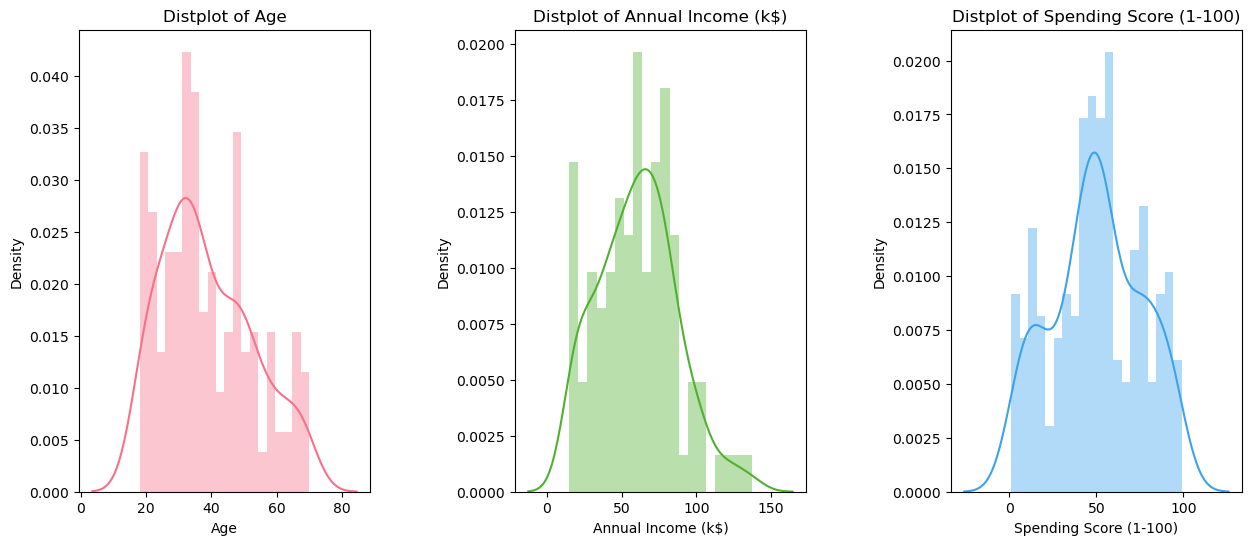

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a single figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

custom_palette = sns.color_palette("husl", 3) 

# Plot the distributions with the custom palette
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    sns.distplot(df[col], bins=20, ax=axes[i], color=custom_palette[i])
    axes[i].set_title(f'Distplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Display the plot
plt.show()


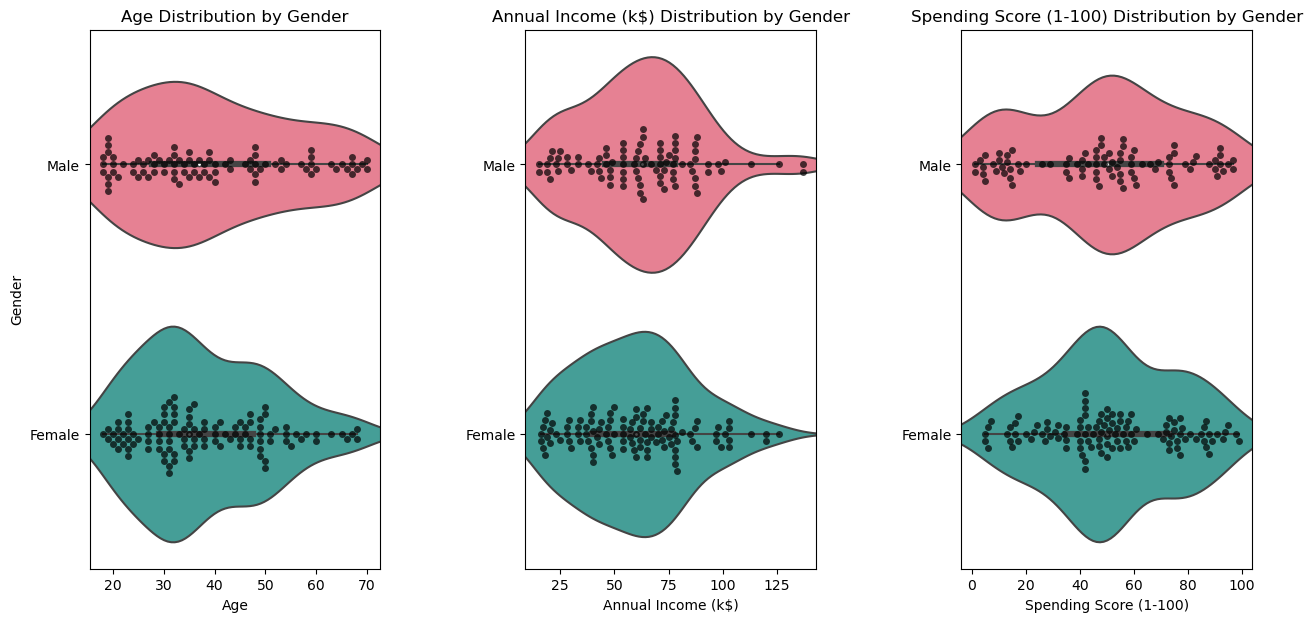

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a single figure with three subplots
plt.figure(figsize=(15, 7))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], start=1):
    plt.subplot(1, 3, i)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    
    # Use the "husl" color palette
    custom_palette = sns.color_palette("husl", n_colors=2)
    
    # Violin plot
    sns.violinplot(x=col, y='Gender', data=df, palette=custom_palette)
    
    # Swarm plot
    sns.swarmplot(x=col, y='Gender', data=df, color='black', alpha=0.7)
    
    plt.ylabel('Gender' if i == 1 else '')
    plt.title(f'{col} Distribution by Gender')

# Show the plot
plt.show()


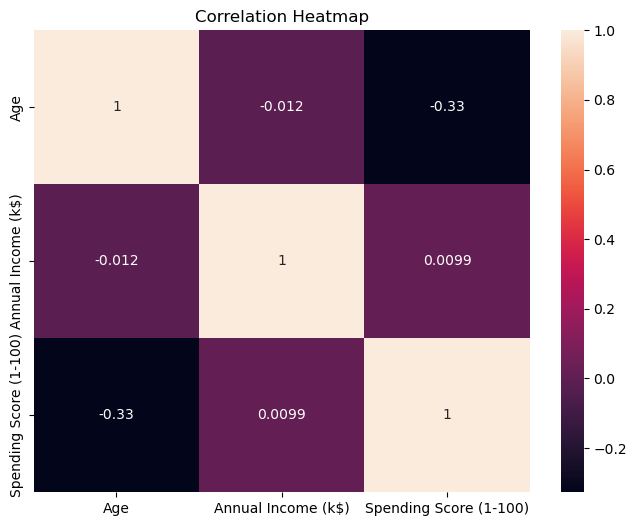

In [11]:
df1 = df.drop(['Gender', 'CustomerID'], axis=1)

# Calculate the correlation matrix
corr_matrix = df1.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

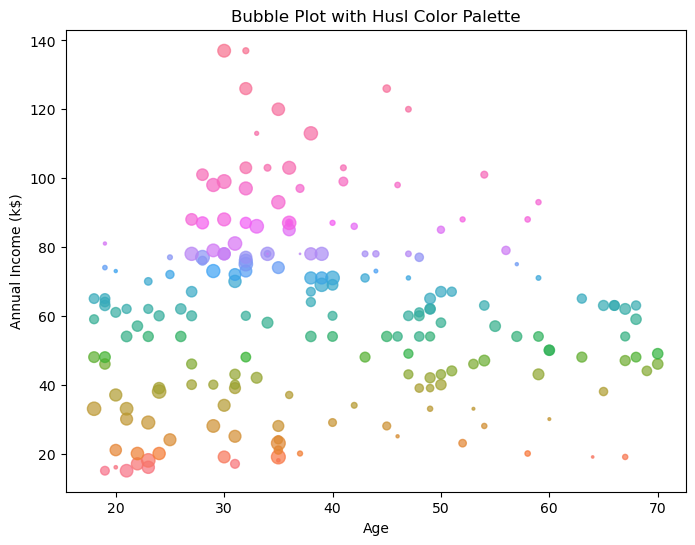

In [12]:
# Set the color palette
bubble_colors = sns.color_palette("husl", n_colors=len(df))

# Create a bubble plot
plt.figure(figsize=(8, 6))
plt.scatter(x=df['Age'], y=df['Annual Income (k$)'], s=df['Spending Score (1-100)'], c=bubble_colors, alpha=0.7)
plt.title('Bubble Plot with Husl Color Palette')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

### Using K- Means

#### Segmentation with Age and Spending score

In [13]:
customer_data = df[['Age', 'Spending Score (1-100)']].values

inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10,
                    max_iter=300, tol=0.0001, random_state=111, algorithm='elkan')
    kmeans.fit(customer_data)
    inertia.append(kmeans.inertia_)

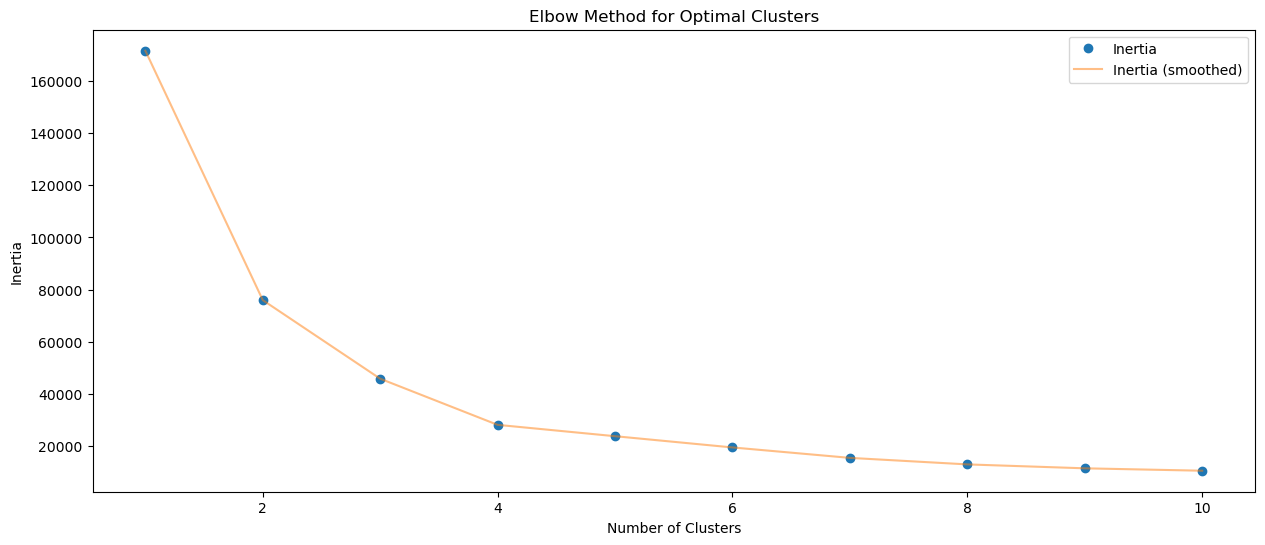

In [14]:
plt.figure(figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia, 'o', label='Inertia')
plt.plot(np.arange(1, 11), inertia, '-', alpha=0.5, label='Inertia (smoothed)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.legend()
plt.show()

In [15]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(customer_data)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [16]:
h = 0.02
x_min, x_max = customer_data[:, 0].min() - 1, customer_data[:, 0].max() + 1
y_min, y_max = customer_data[:, 1].min() - 1, customer_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 


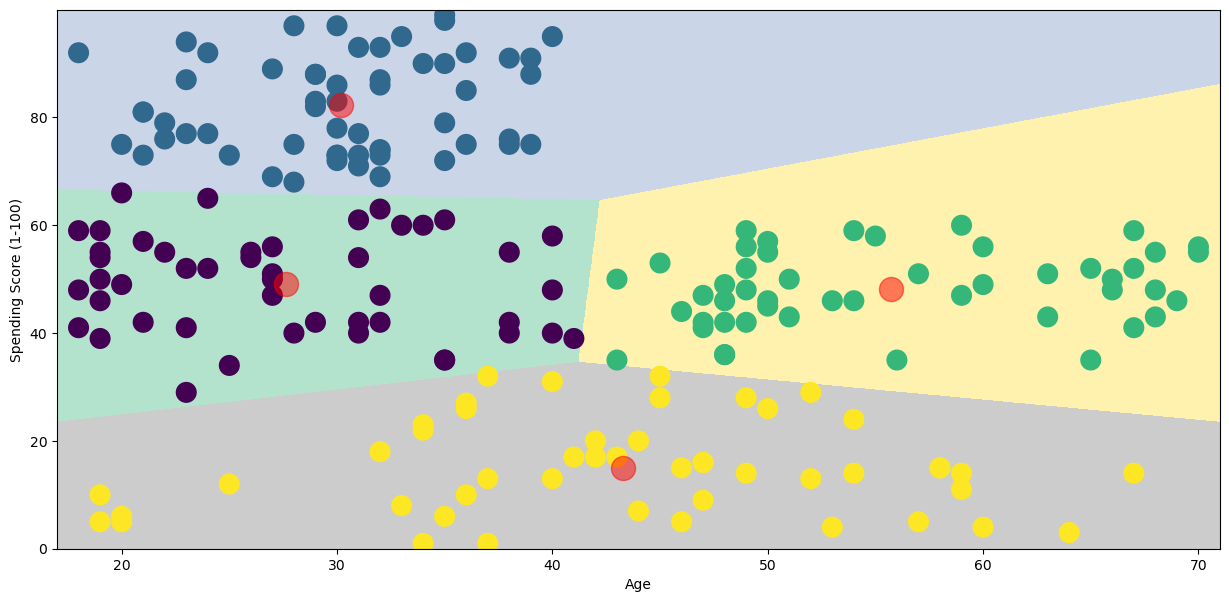

In [17]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 200 ) 
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()


#### Segementation with Annual Income and Spending Score

In [18]:
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

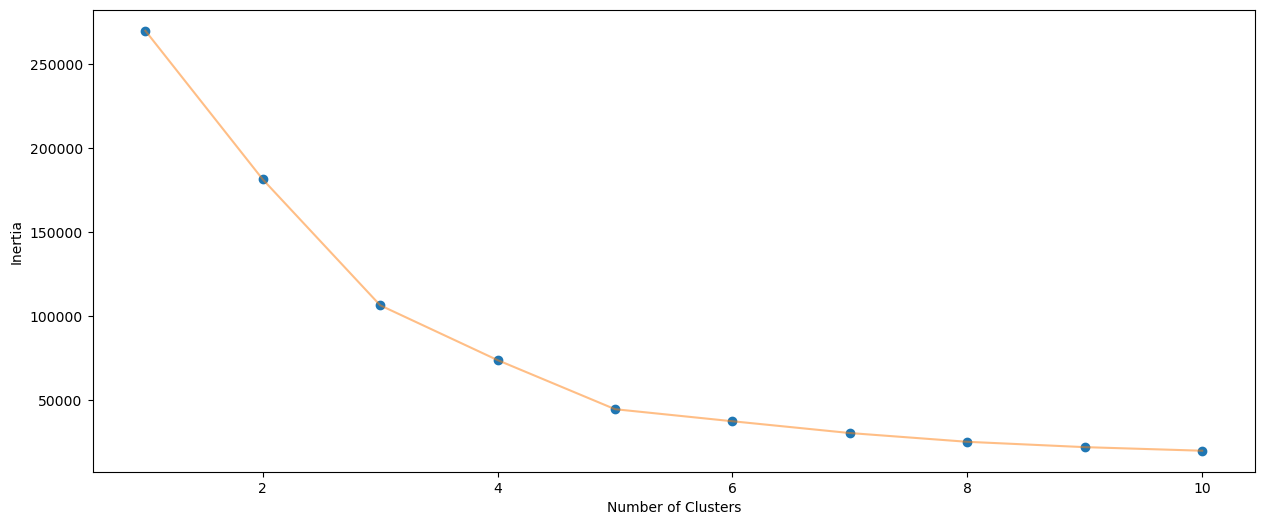

In [19]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [20]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [21]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

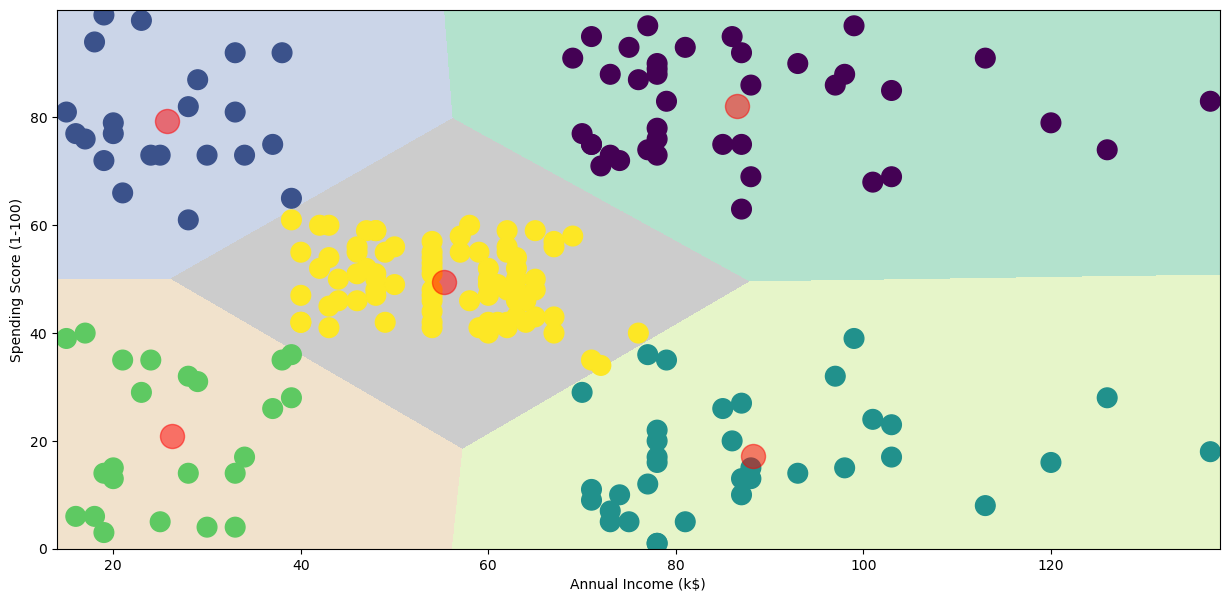

In [22]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

#### Segmentation with Age , Annual Income and Spending Score

In [23]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

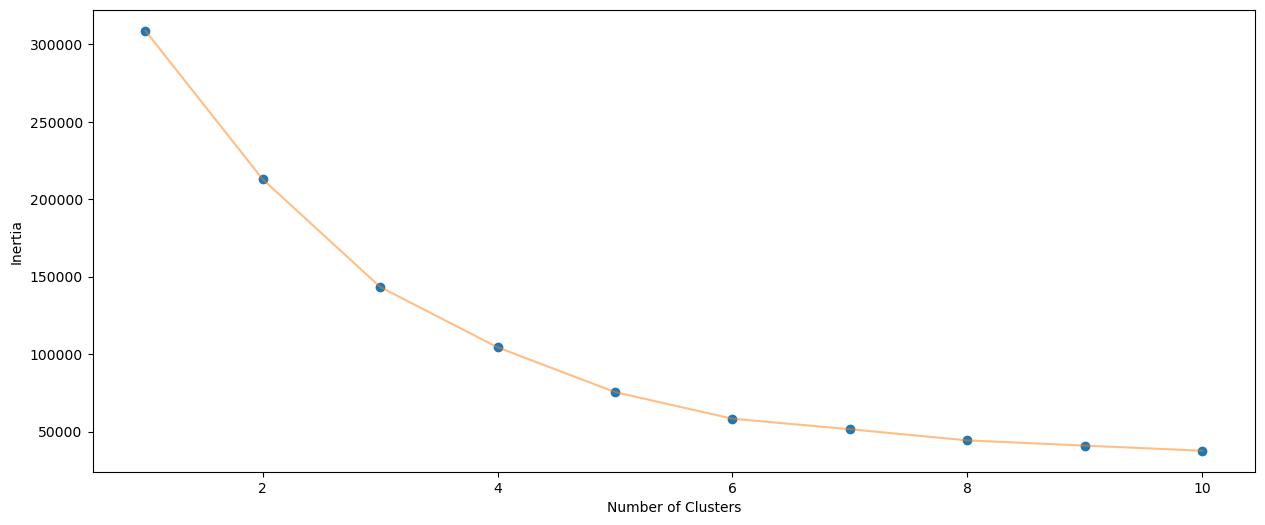

In [24]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [25]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

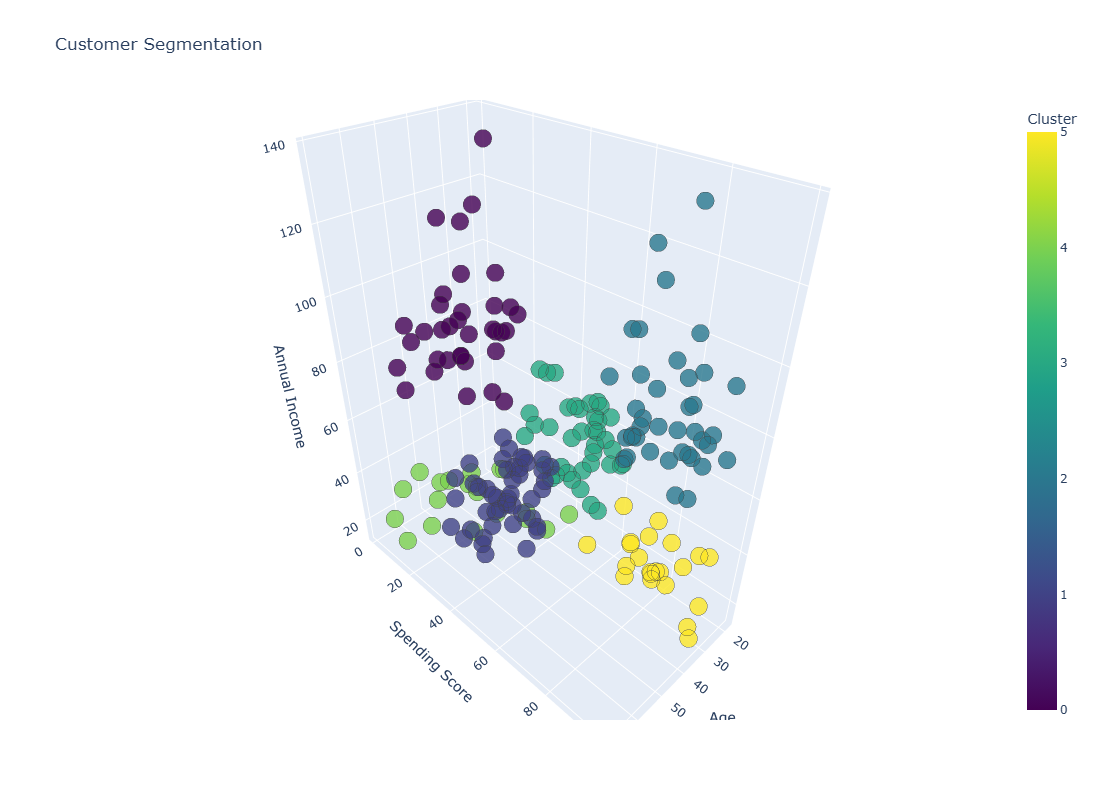

In [26]:
import plotly.graph_objs as go
import plotly.offline as py

# Assuming df and labels3 are already defined and 'label3' column is added to df
df['label3'] = labels3

trace1 = go.Scatter3d(
    x=df['Age'],
    y=df['Spending Score (1-100)'],
    z=df['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        size=10,  # Adjust size for better visibility
        opacity=0.8,
        line=dict(width=2),
        color=df['label3'],
        colorscale='Viridis',  # Use a warm color scale
        colorbar=dict(title='Cluster')
    )
)

data = [trace1]
layout = go.Layout(
    title='Customer Segmentation',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending Score'),
        zaxis=dict(title='Annual Income')
    ),
    width=1000,  # Set the width of the figure
    height=800   # Set the height of the figure
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)


In [27]:
import plotly.graph_objs as go
import plotly.offline as py

# Assuming df and labels3 are already defined and 'label3' column is added to df
df['label3'] = labels3

trace1 = go.Scatter3d(
    x=df['Age'],
    y=df['Spending Score (1-100)'],
    z=df['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        size=10,  # Adjust size for better visibility
        opacity=0.8,
        line=dict(width=2),
        color=df['label3'],
        colorscale='Viridis',  # Use a warm color scale
        colorbar=dict(title='Cluster')
    )
)

data = [trace1]
layout = go.Layout(
    title='Customer Segmentation',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending Score'),
        zaxis=dict(title='Annual Income')
    ),
    width=1000,  # Set the width of the figure
    height=800   # Set the height of the figure
)

fig = go.Figure(data=data, layout=layout)

# Save the plot as an HTML file
py.plot(fig, filename='customer_segmentation.html', auto_open=False)

'customer_segmentation.html'